In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os

D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarnin

## 数据导入与分析

In [23]:
# 读取数据
testdata = pd.read_csv('../data/dataannalysis/happiness_test_abbr.csv')
traindata = pd.read_csv('../data/dataannalysis/happiness_train_abbr.csv')

In [24]:
#异常数据处理
traindata = traindata[traindata['happiness'] != -8]
traindata['depression'].replace(-8,2,inplace = True)
traindata['class'].replace(-8,4,inplace = True)
traindata['health'].replace(-8,0,inplace = True)
traindata['equity'].replace(-8,3,inplace = True)
traindata['family_status'].replace(-8,3,inplace = True)
traindata['health_problem'].replace(-8,2,inplace = True)
traindata['relax'].replace(-8,3,inplace = True)
traindata['learn'].replace(-8,3,inplace = True)
traindata['view'].replace(-8,3,inplace = True)
traindata['socialize'].replace(-8,3,inplace = True)
traindata['edu'].replace(-8,0,inplace = True)

avg_income=traindata['family_income']/traindata['family_m']
traindata['avg_income'] = avg_income
traindata['avg_income'].replace('nan',0,inplace = True)
bins = [-1000,0,20000,50000,100000,1000000,100000000] 
traindata['avg_income'] = pd.cut(traindata['avg_income'],bins, labels=[1,2, 3, 4,5, 6])
# le = preprocessing.LabelEncoder() 
# le.fit([1,2, 3, 4,5, 6]) 
# traindata['avg_income']  = le.transform(traindata['avg_income'] ) 

traindata['birth'] =2015-traindata['birth']
bins = [16, 30,45,60,100] 
traindata['birth'] = pd.cut(traindata['birth'],bins, labels=[1,2, 3, 4])
le = preprocessing.LabelEncoder() 
le.fit([1,2, 3, 4]) 
traindata['birth']  = le.transform(traindata['birth'] ) 

bins = [-100,0,100000,300000,500000,1000000,10000000] 
traindata['income'] = pd.cut(traindata['income'],bins, labels=[1,2, 3, 4,5, 6])
le = preprocessing.LabelEncoder() 
le.fit([1,2, 3, 4,5,6]) 
traindata['income']  = le.transform(traindata['income'] ) 


bins = [0,30,60,100,130,1500] 
traindata['floor_area'] = pd.cut(traindata['floor_area'],bins, labels=[1,2, 3, 4,5])
le = preprocessing.LabelEncoder() 
le.fit([1,2, 3, 4,5]) 
traindata['floor_area']  = le.transform(traindata['floor_area'] ) 



whbmi=(traindata['weight_jin']/2)/((traindata['height_cm']/100)*(traindata['height_cm']/100))
traindata['whbmi'] = whbmi
bins = [0,18.5,24,28,32,50] 
traindata['whbmi'] = pd.cut(traindata['whbmi'],bins, labels=[1,2, 3, 4,5])
le = preprocessing.LabelEncoder() 
le.fit([1,2, 3, 4,5, 6]) 
traindata['whbmi']  = le.transform(traindata['whbmi'] ) 




#19.car -8设置为0
traindata['car'].replace(-8,0,inplace = True)

#20.marital 我们设置一下1 = 未婚; 2 = 同居; 3 = 初婚有配偶; 4 = 再婚有配偶; 5 = 分居未离婚; 6 = 离婚; 7 = 丧偶;
#将1和7合并为1 2和3合并为2 5和6合并为5
traindata['marital'].replace(7,1,inplace = True)
traindata['marital'].replace(3,2,inplace = True)
traindata['marital'].replace(6,5,inplace = True)

#21.status_peer-8的幸福感较低用4替换
traindata['status_peer'].replace(-8,4,inplace = True)

#22.status_peer-8的幸福感较低用4替换
traindata['status_3_before'].replace(-8,4,inplace = True)


#22.status_peer-8的幸福感接近于3用3替换
traindata['inc_ability'].replace(-8,3,inplace = True)


In [25]:
traindatafinal = traindata[['happiness','edu','health','health_problem','depression','relax','learn','equity','class','family_status','car','status_peer','status_3_before','view','inc_ability']]


In [26]:
traindatafinal.head()

,happiness,edu,health,health_problem,depression,relax,learn,equity,class,family_status,car,status_peer,status_3_before,view,inc_ability
0,4,11,3,2,5,4,3,3,3,2,2,3,2,4,3
1,4,12,5,4,3,4,3,3,6,4,2,1,1,4,2
2,4,4,4,4,5,4,2,4,5,3,2,2,1,4,2
3,5,3,4,4,4,4,4,4,5,3,1,2,1,3,2
4,4,12,5,5,3,3,4,2,1,3,1,3,2,3,3


## 拆分训练集，测试集，验证集

In [50]:
train, test = train_test_split(traindatafinal, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

5112 train examples
1278 validation examples
1598 test examples


In [51]:
train_x = train.copy()
trainlabels = train_x.pop('happiness')
train_y = tf.one_hot(trainlabels-1,5)


test_x = test.copy()
testlabels = test_x.pop('happiness')
test_y = tf.one_hot(testlabels-1,5)

val_x = train.copy()
vallabels = val_x.pop('happiness')
val_y = tf.one_hot(vallabels-1,5)

train_x.head()

,edu,health,health_problem,depression,relax,learn,equity,class,family_status,car,status_peer,status_3_before,view,inc_ability
7155,4,5,5,5,2,2,2,3,2,2,2,2,3,3
5251,7,2,2,4,4,2,4,6,3,2,1,3,2,2
964,10,4,4,4,2,2,4,4,3,1,2,1,4,3
2635,3,4,4,4,4,2,5,2,3,2,2,2,4,3
2843,9,3,4,4,3,3,3,5,3,2,2,2,3,2


#### 归一化处理

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()

In [53]:
X_train_minmax = min_max_scaler.fit_transform(train_x)
X_test_minmax = min_max_scaler.fit_transform(test_x)
X_val_minmax = min_max_scaler.fit_transform(val_x)

In [54]:
X_train = pd.DataFrame(X_train_minmax)
X_test = pd.DataFrame(X_test_minmax)
X_val = pd.DataFrame(X_val_minmax)

In [55]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.285714,1.0,1.00,1.00,0.25,0.25,0.25,0.222222,0.25,1.0,0.333333,0.333333,0.50,0.666667
1,0.500000,0.4,0.25,0.75,0.75,0.25,0.75,0.555556,0.50,1.0,0.000000,0.666667,0.25,0.333333
2,0.714286,0.8,0.75,0.75,0.25,0.25,0.75,0.333333,0.50,0.5,0.333333,0.000000,0.75,0.666667
3,0.214286,0.8,0.75,0.75,0.75,0.25,1.00,0.111111,0.50,1.0,0.333333,0.333333,0.75,0.666667
4,0.642857,0.6,0.75,0.75,0.50,0.50,0.50,0.444444,0.50,1.0,0.333333,0.333333,0.50,0.333333


In [59]:
model = tf.keras.Sequential([
#   layers.Flatten(input_shape=(NONE, 28)),
  layers.Dense(10,kernel_regularizer= tf.keras.regularizers.l2(0.001), activation='relu', input_shape=[14]),
  layers.Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='relu'),
  layers.Dense(5, activation='sigmoid')
])
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['accuracy','mae', 'mse'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                150       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 40        
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(X_train,
                    train_y,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_val, val_y),
                    verbose=1)

Train on 5112 samples, validate on 5112 samples
Epoch 1/40
5112/5112 [==============================] - 0s 63us/sample - loss: 0.2685 - accuracy: 0.4173 - mae: 0.4993 - mse: 0.2496 - val_loss: 0.2629 - val_accuracy: 0.5288 - val_mae: 0.4941 - val_mse: 0.2445
Epoch 2/40
5112/5112 [==============================] - 0s 5us/sample - loss: 0.2598 - accuracy: 0.5503 - mae: 0.4910 - mse: 0.2417 - val_loss: 0.2561 - val_accuracy: 0.5710 - val_mae: 0.4871 - val_mse: 0.2383
Epoch 3/40
5112/5112 [==============================] - 0s 4us/sample - loss: 0.2531 - accuracy: 0.5827 - mae: 0.4838 - mse: 0.2356 - val_loss: 0.2495 - val_accuracy: 0.5945 - val_mae: 0.4795 - val_mse: 0.2323
Epoch 4/40
5112/5112 [==============================] - 0s 5us/sample - loss: 0.2466 - accuracy: 0.5974 - mae: 0.4760 - mse: 0.2297 - val_loss: 0.2431 - val_accuracy: 0.5982 - val_mae: 0.4715 - val_mse: 0.2265
Epoch 5/40
5112/5112 [==============================] - 0s 4us/sample - loss: 0.2404 - accuracy: 0.5982 - mae: 

Epoch 40/40
5112/5112 [==============================] - 0s 5us/sample - loss: 0.1214 - accuracy: 0.5984 - mae: 0.2394 - mse: 0.1174 - val_loss: 0.1213 - val_accuracy: 0.5984 - val_mae: 0.2398 - val_mse: 0.1174


In [41]:
results = model.evaluate(X_test, test_y)

print(results)

1598/1598 [==============================] - 0s 17us/sample - loss: 0.1206 - accuracy: 0.5920 - mae: 0.2408 - mse: 0.1163
[0.12059833128028578, 0.59199, 0.2408336, 0.11627044]


In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'mae', 'mse', 'val_loss', 'val_accuracy', 'val_mae', 'val_mse'])

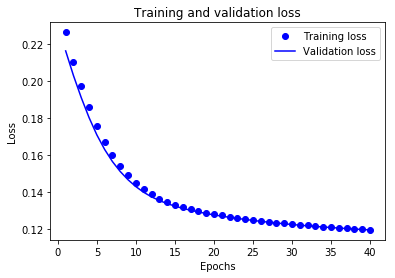

In [43]:
import matplotlib.pyplot as plt

acc = history_dict['mae']
val_acc = history_dict['val_mae']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [44]:
predictions= model.predict(X_test)


In [45]:
predictions

array([[0.05569711, 0.10330084, 0.22843799, 0.57606226, 0.19733098],
       [0.03251997, 0.06282803, 0.1467284 , 0.61079884, 0.17505977],
       [0.03760514, 0.07106987, 0.1699019 , 0.5989627 , 0.17739502],
       ...,
       [0.02860069, 0.05529168, 0.13464886, 0.6154643 , 0.16875318],
       [0.03078949, 0.05942425, 0.13714725, 0.61456686, 0.1759277 ],
       [0.03474887, 0.06574353, 0.14864329, 0.60965884, 0.18150938]],
      dtype=float32)